In [1]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Cargamos desde un archivo .xlsx sin indice
data=pd.read_csv('Mexico_sin_nulos.csv')
data

Unnamed: 0            id  \
0               0  3.579700e+04   
1               1  4.461600e+04   
2               2  6.770300e+04   
3               3  7.064400e+04   
4               4  1.070780e+05   
...           ...           ...   
26577       26577  1.250000e+18   
26578       26578  1.250000e+18   
26579       26579  1.250000e+18   
26580       26580  1.250000e+18   
26581       26581  1.250000e+18   

                                                   name  \
0                                           Villa Dante   
1                                          Condesa Haus   
2                     2 bedroom apt. deco bldg, Condesa   
3      Beautiful light Studio Coyoacan- full equipped !   
4                                    NEW  DESIGNER LOFT   
...                                                 ...   
26577    Charming 2-Bedroom Retreat in Lomas de Bezares   
26578                     Suite King | District Polanco   
26579                     Suite King | District Polanco   
26580                    Suite Queen | District Polanco   
26581                  Pretty, well centered, amenities   

                                             description  \
0      Dentro de Villa un estudio de arte con futon, ...   
1      A new concept of hosting in mexico through a b...   
2      Comfortably furnished, sunny, 2 bedroom apt., ...   
3      COYOACAN designer studio quiet & safe! well eq...   
4      Is the best ever place triple L <br />Location...   
...                                                  ...   
26577  Experience Mexico City in this delightful retr...   
26578  This spacious room features a plush king-size ...   
26579  Discover the essence of luxury in our king-siz...   
26580  Welcome to your refuge in the heart of Polanco...   
26581  Known as New Polanco, the Granada colony has p...   

                                   neighborhood_overview    host_id  \
0      Santa Fe Mall, Interloma Park and the Lion Des...     153786   
1                                          No disponible     196253   
2                                          No disponible     334451   
3      Coyoacan is a beautiful neighborhood famous fo...     212109   
4      Is located in the best area of Mexico City, Po...     540705   
...                                                  ...        ...   
26577  Welcome to Lomas de Bezares, a neighborhood kn...   67472234   
26578                                      No disponible  596009321   
26579                                      No disponible  596009321   
26580                                      No disponible  596009321   
26581                                      No disponible    6522855   

        host_name  host_since        host_location  \
0            Dici  28/06/2010  Mexico City, Mexico   
1        Fernando  09/08/2010  Mexico City, Mexico   
2        Nicholas  04/01/2011  Mexico City, Mexico   
3          Trisha  24/08/2010  Mexico City, Mexico   
4          Andrea  27/04/2011  Mexico City, Mexico   
...           ...         ...                  ...   
26577     HostPal  16/04/2016  Mexico City, Mexico   
26578  Luis Angel  13/08/2024  Mexico City, Mexico   
26579  Luis Angel  13/08/2024  Mexico City, Mexico   
26580  Luis Angel  13/08/2024  Mexico City, Mexico   
26581    Salvador  22/05/2013  Mexico City, Mexico   

                                              host_about  ...  \
0      Master in visual arts, film photography & Mark...  ...   
1      Condesa Haus  offers independent  studios and ...  ...   
2      I am a journalist writing about food, (book an...  ...   
3      I am a mother, documentary film maker and phot...  ...   
4      I Leave in Mexico City... I am an Architect an...  ...   
...                                                  ...  ...   
26577                                      No disponible  ...   
26578  We offer beautiful, comfortable spaces that wo...  ...   
26579  We offer beautiful, comfortable spaces that wo...  ...   
2658

In [4]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                     0
id                             0
name                           0
description                    0
neighborhood_overview          0
host_id                        0
host_name                      0
host_since                     0
host_location                  0
host_about                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
neighbourhood                  0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_ma

In [5]:
#Verificamos información del DATAFRAME
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   id                           26582 non-null  float64
 2   name                         26582 non-null  object 
 3   description                  26582 non-null  object 
 4   neighborhood_overview        26582 non-null  object 
 5   host_id                      26582 non-null  int64  
 6   host_name                    26582 non-null  object 
 7   host_since                   26582 non-null  object 
 8   host_location                26582 non-null  object 
 9   host_about                   26582 non-null  object 
 10  host_response_time           26582 non-null  object 
 11  host_response_rate           26582 non-null  object 
 12  host_acceptance_rate         26582 non-null  object 
 13  neighbourhood   

In [6]:
#Creo 2 dataframe para poder procesar los outliers
#Separo las variables cuantitativas y cualitativas y creo 2 dataframe para poder procesar los outliers.
#ya que los outliers solo trabaja con numericos
cuantitativas= data.iloc[:, [0,1,5,15,16,19,20,22,23,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,50]]
cualitativas= data.iloc[:, [2,3,4,6,7,8,9,10,11,12,13,14,17,18,21,24,25,38,49]]

In [7]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   id                           26582 non-null  float64
 2   host_id                      26582 non-null  int64  
 3   latitude                     26582 non-null  float64
 4   longitude                    26582 non-null  float64
 5   accommodates                 26582 non-null  int64  
 6   bathrooms                    26582 non-null  float64
 7   bedrooms                     26582 non-null  float64
 8   beds                         26582 non-null  float64
 9   minimum_nights               26582 non-null  int64  
 10  maximum_nights               26582 non-null  int64  
 11  minimum_minimum_nights       26582 non-null  int64  
 12  maximum_minimum_nights       26582 non-null  int64  
 13  minimum_maximum_

In [8]:
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    26582 non-null  object
 1   description             26582 non-null  object
 2   neighborhood_overview   26582 non-null  object
 3   host_name               26582 non-null  object
 4   host_since              26582 non-null  object
 5   host_location           26582 non-null  object
 6   host_about              26582 non-null  object
 7   host_response_time      26582 non-null  object
 8   host_response_rate      26582 non-null  object
 9   host_acceptance_rate    26582 non-null  object
 10  neighbourhood           26582 non-null  object
 11  neighbourhood_cleansed  26582 non-null  object
 12  property_type           26582 non-null  object
 13  room_type               26582 non-null  object
 14  bathrooms_text          26582 non-null  object
 15  am

In [9]:
#COrroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                     0
id                             0
name                           0
description                    0
neighborhood_overview          0
host_id                        0
host_name                      0
host_since                     0
host_location                  0
host_about                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
neighbourhood                  0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_ma

<Figure size 1500x800 with 0 Axes>

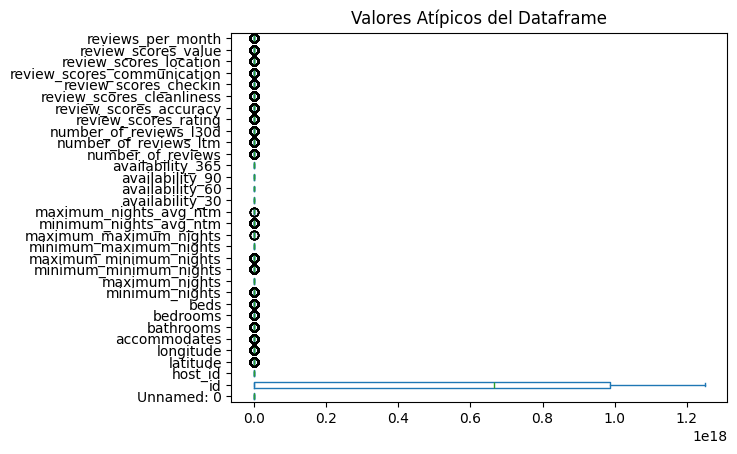

In [10]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig= plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box',vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACION ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [11]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior=y.mean() + 3*y.std()
Limite_Inferior=y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Límite inferior permitido", Limite_Inferior)

Límite superior permitido Unnamed: 0                     3.631162e+04
id                             1.997600e+18
host_id                        7.675833e+08
latitude                       1.953289e+01
longitude                     -9.906674e+01
accommodates                   1.043010e+01
bathrooms                      4.608162e+00
bedrooms                       5.346827e+00
beds                           6.956376e+00
minimum_nights                 8.183006e+01
maximum_nights                 1.793887e+03
minimum_minimum_nights         7.822020e+01
maximum_minimum_nights         8.040781e+01
minimum_maximum_nights         2.058532e+03
maximum_maximum_nights         2.133457e+03
minimum_nights_avg_ntm         7.949662e+01
maximum_nights_avg_ntm         2.102283e+03
availability_30                4.852387e+01
availability_60                9.733159e+01
availability_90                1.496068e+02
availability_365               6.026093e+02
number_of_reviews              2.711536e+02
number

In [12]:
#Obtenemos datos y los outliers se convierten en nulos en el Dataframe
#los valores que no están dentro del bigote se convierten en nulos
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

Unnamed: 0            id    host_id   latitude  longitude  \
0               0  3.579700e+04     153786  19.383820        NaN   
1               1  4.461600e+04     196253  19.411620 -99.177940   
2               2  6.770300e+04     334451  19.411520 -99.168570   
3               3  7.064400e+04     212109  19.356140 -99.163080   
4               4  1.070780e+05     540705  19.432110 -99.193270   
...           ...           ...        ...        ...        ...   
26577       26577  1.250000e+18   67472234  19.387329 -99.246731   
26578       26578  1.250000e+18  596009321  19.432687 -99.197736   
26579       26579  1.250000e+18  596009321  19.432687 -99.197736   
26580       26580  1.250000e+18  596009321  19.432687 -99.197736   
26581       26581  1.250000e+18    6522855  19.443476 -99.201748   

       accommodates  bathrooms  bedrooms  beds  minimum_nights  ...  \
0               2.0        1.0       1.0   1.0             1.0  ...   
1               NaN        1.5       5.0   1.0             1.0  ...   
2               4.0        1.0       2.0   2.0             2.0  ...   
3               2.0        1.0       1.0   1.0             5.0  ...   
4               2.0        1.5       1.0   1.0             1.0  ...   
...             ...        ...       ...   ...             ...  ...   
26577           4.0        1.0       2.0   2.0             1.0  ...   
26578           2.0        1.0       1.0   1.0             1.0  ...   
26579           2.0        1.0       1.0   1.0             1.0  ...   
26580           2.0        1.0       1.0   1.0             1.0  ...   
26581           2.0        1.0       1.0   1.0             1.0  ...   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                        0.0                     0.0                  4.58   
1                        0.0                     0.0                  4.58   
2                        4.0                     0.0                  4.90   
3                        7.0                     2.0                  4.91   
4                        0.0                     0.0                  4.91   
...                      ...                     ...                   ...   
26577                    0.0                     0.0                  5.00   
26578                    0.0                     0.0                  5.00   
26579                    0.0                     0.0                  5.00   
26580                    0.0                     0.0                  5.00   
26581                    0.0                     0.0                  5.00   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.86   
1                        4.56                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
26577                    4.79                       4.86   
26578                    4.79                       4.86   
26579                    4.79                       4.86   
26580                    4.79                       4.86   
26581                    4.79                       4.86   

       review_scores_checkin  review_scores_communication  \
0                       4.87                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.73   
...                      ...                          ...   
26577                   5.00                         4.83   
26578                   5.00                         4.83   
26579                   5.00                         4.83   
26580                   5.00                         4.83   
26581   

In [13]:
#Corroboramos valores nulos del dataframe
valores_nulos=data3.isnull().sum()
valores_nulos

Unnamed: 0                       0
id                               0
host_id                          0
latitude                       357
longitude                      712
accommodates                   526
bathrooms                      309
bedrooms                       286
beds                           466
minimum_nights                 190
maximum_nights                   1
minimum_minimum_nights         174
maximum_minimum_nights         192
minimum_maximum_nights           0
maximum_maximum_nights           7
minimum_nights_avg_ntm         184
maximum_nights_avg_ntm           7
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews              608
number_of_reviews_ltm          432
number_of_reviews_l30d         511
review_scores_rating           431
review_scores_accuracy         402
review_scores_cleanliness      437
review_scores_checkin          355
review_scores_commun

In [14]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

Unnamed: 0            id    host_id   latitude  longitude  \
0               0  3.579700e+04     153786  19.383820 -99.200000   
1               1  4.461600e+04     196253  19.411620 -99.177940   
2               2  6.770300e+04     334451  19.411520 -99.168570   
3               3  7.064400e+04     212109  19.356140 -99.163080   
4               4  1.070780e+05     540705  19.432110 -99.193270   
...           ...           ...        ...        ...        ...   
26577       26577  1.250000e+18   67472234  19.387329 -99.246731   
26578       26578  1.250000e+18  596009321  19.432687 -99.197736   
26579       26579  1.250000e+18  596009321  19.432687 -99.197736   
26580       26580  1.250000e+18  596009321  19.432687 -99.197736   
26581       26581  1.250000e+18    6522855  19.443476 -99.201748   

       accommodates  bathrooms  bedrooms  beds  minimum_nights  ...  \
0               2.0        1.0       1.0   1.0             1.0  ...   
1               3.1        1.5       5.0   1.0             1.0  ...   
2               4.0        1.0       2.0   2.0             2.0  ...   
3               2.0        1.0       1.0   1.0             5.0  ...   
4               2.0        1.5       1.0   1.0             1.0  ...   
...             ...        ...       ...   ...             ...  ...   
26577           4.0        1.0       2.0   2.0             1.0  ...   
26578           2.0        1.0       1.0   1.0             1.0  ...   
26579           2.0        1.0       1.0   1.0             1.0  ...   
26580           2.0        1.0       1.0   1.0             1.0  ...   
26581           2.0        1.0       1.0   1.0             1.0  ...   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                        0.0                     0.0                  4.58   
1                        0.0                     0.0                  4.58   
2                        4.0                     0.0                  4.90   
3                        7.0                     2.0                  4.91   
4                        0.0                     0.0                  4.91   
...                      ...                     ...                   ...   
26577                    0.0                     0.0                  5.00   
26578                    0.0                     0.0                  5.00   
26579                    0.0                     0.0                  5.00   
26580                    0.0                     0.0                  5.00   
26581                    0.0                     0.0                  5.00   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.86   
1                        4.56                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
26577                    4.79                       4.86   
26578                    4.79                       4.86   
26579                    4.79                       4.86   
26580                    4.79                       4.86   
26581                    4.79                       4.86   

       review_scores_checkin  review_scores_communication  \
0                       4.87                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.73   
...                      ...                          ...   
26577                   5.00                         4.83   
26578                   5.00                         4.83   
26579                   5.00                         4.83   
26580                   5.00                         4.83   
26581   

In [15]:
valores_nulos= data_clean.isnull().sum()
valores_nulos

Unnamed: 0                     0
id                             0
host_id                        0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_sco

<Figure size 1500x800 with 0 Axes>

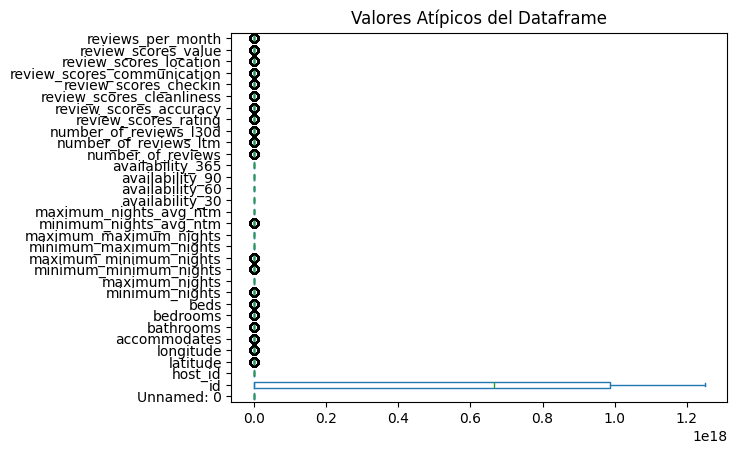

In [16]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig= plt.figure(figsize=(15,8))
data_clean.plot(kind='box',vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

PROCEDIMIENTO "CUANTITATIVAS" 

In [17]:
#Metodo aplicando Cuartiles.Encuentre cuartiles 0.25 y 0.75
y= cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75 +1.5*iqr
Limite_Inferior_iqr= percentile25 -1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido Unnamed: 0                     3.987150e+04
id                             2.467500e+18
host_id                        8.612864e+08
latitude                       1.949409e+01
longitude                     -9.911773e+01
accommodates                   7.000000e+00
bathrooms                      3.500000e+00
bedrooms                       3.500000e+00
beds                           3.500000e+00
minimum_nights                 3.500000e+00
maximum_nights                 2.542500e+03
minimum_minimum_nights         3.500000e+00
maximum_minimum_nights         6.000000e+00
minimum_maximum_nights         2.265000e+03
maximum_maximum_nights         2.265000e+03
minimum_nights_avg_ntm         5.250000e+00
maximum_nights_avg_ntm         2.265000e+03
availability_30                6.350000e+01
availability_60                1.130000e+02
availability_90                1.625000e+02
availability_365               7.105000e+02
number_of_reviews              1.355000e+02
number

In [18]:
#Obtenemos datos y los outliers se convierten en nulos en el Dataframe
#los valores que no están dentro del bigote se convierten en nulos
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

Unnamed: 0            id    host_id   latitude  longitude  \
0               0  3.579700e+04     153786  19.383820        NaN   
1               1  4.461600e+04     196253  19.411620 -99.177940   
2               2  6.770300e+04     334451  19.411520 -99.168570   
3               3  7.064400e+04     212109  19.356140 -99.163080   
4               4  1.070780e+05     540705  19.432110 -99.193270   
...           ...           ...        ...        ...        ...   
26577       26577  1.250000e+18   67472234  19.387329        NaN   
26578       26578  1.250000e+18  596009321  19.432687 -99.197736   
26579       26579  1.250000e+18  596009321  19.432687 -99.197736   
26580       26580  1.250000e+18  596009321  19.432687 -99.197736   
26581       26581  1.250000e+18    6522855  19.443476 -99.201748   

       accommodates  bathrooms  bedrooms  beds  minimum_nights  ...  \
0               2.0        1.0       1.0   1.0             1.0  ...   
1               NaN        1.5       NaN   1.0             1.0  ...   
2               4.0        1.0       2.0   2.0             2.0  ...   
3               2.0        1.0       1.0   1.0             NaN  ...   
4               2.0        1.5       1.0   1.0             1.0  ...   
...             ...        ...       ...   ...             ...  ...   
26577           4.0        1.0       2.0   2.0             1.0  ...   
26578           2.0        1.0       1.0   1.0             1.0  ...   
26579           2.0        1.0       1.0   1.0             1.0  ...   
26580           2.0        1.0       1.0   1.0             1.0  ...   
26581           2.0        1.0       1.0   1.0             1.0  ...   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                        0.0                     0.0                  4.58   
1                        0.0                     0.0                  4.58   
2                        4.0                     0.0                  4.90   
3                        7.0                     2.0                  4.91   
4                        0.0                     0.0                  4.91   
...                      ...                     ...                   ...   
26577                    0.0                     0.0                  5.00   
26578                    0.0                     0.0                  5.00   
26579                    0.0                     0.0                  5.00   
26580                    0.0                     0.0                  5.00   
26581                    0.0                     0.0                  5.00   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.86   
1                        4.56                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
26577                    4.79                       4.86   
26578                    4.79                       4.86   
26579                    4.79                       4.86   
26580                    4.79                       4.86   
26581                    4.79                       4.86   

       review_scores_checkin  review_scores_communication  \
0                       4.87                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.73   
...                      ...                          ...   
26577                   5.00                         4.83   
26578                   5.00                         4.83   
26579                   5.00                         4.83   
26580                   5.00                         4.83   
26581   

In [19]:
#Corroboramos valores nulos del dataframe limpio
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

Unnamed: 0                        0
id                                0
host_id                           0
latitude                       1779
longitude                      2845
accommodates                   1352
bathrooms                       644
bedrooms                        858
beds                           2447
minimum_nights                 3584
maximum_nights                    0
minimum_minimum_nights         3124
maximum_minimum_nights         2040
minimum_maximum_nights            0
maximum_maximum_nights            7
minimum_nights_avg_ntm         2023
maximum_nights_avg_ntm            7
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews              2328
number_of_reviews_ltm          1318
number_of_reviews_l30d          813
review_scores_rating           1650
review_scores_accuracy         2198
review_scores_cleanliness      1987
review_scores_checkin       

In [20]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr= data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

Unnamed: 0            id    host_id   latitude  longitude  \
0               0  3.579700e+04     153786  19.383820 -99.200000   
1               1  4.461600e+04     196253  19.411620 -99.177940   
2               2  6.770300e+04     334451  19.411520 -99.168570   
3               3  7.064400e+04     212109  19.356140 -99.163080   
4               4  1.070780e+05     540705  19.432110 -99.193270   
...           ...           ...        ...        ...        ...   
26577       26577  1.250000e+18   67472234  19.387329 -99.200000   
26578       26578  1.250000e+18  596009321  19.432687 -99.197736   
26579       26579  1.250000e+18  596009321  19.432687 -99.197736   
26580       26580  1.250000e+18  596009321  19.432687 -99.197736   
26581       26581  1.250000e+18    6522855  19.443476 -99.201748   

       accommodates  bathrooms  bedrooms  beds  minimum_nights  ...  \
0               2.0        1.0       1.0   1.0             1.0  ...   
1               2.9        1.5       1.4   1.0             1.0  ...   
2               4.0        1.0       2.0   2.0             2.0  ...   
3               2.0        1.0       1.0   1.0             1.6  ...   
4               2.0        1.5       1.0   1.0             1.0  ...   
...             ...        ...       ...   ...             ...  ...   
26577           4.0        1.0       2.0   2.0             1.0  ...   
26578           2.0        1.0       1.0   1.0             1.0  ...   
26579           2.0        1.0       1.0   1.0             1.0  ...   
26580           2.0        1.0       1.0   1.0             1.0  ...   
26581           2.0        1.0       1.0   1.0             1.0  ...   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                        0.0                     0.0                  4.58   
1                        0.0                     0.0                  4.58   
2                        4.0                     0.0                  4.90   
3                        7.0                     2.0                  4.91   
4                        0.0                     0.0                  4.91   
...                      ...                     ...                   ...   
26577                    0.0                     0.0                  5.00   
26578                    0.0                     0.0                  5.00   
26579                    0.0                     0.0                  5.00   
26580                    0.0                     0.0                  5.00   
26581                    0.0                     0.0                  5.00   

       review_scores_accuracy  review_scores_cleanliness  \
0                        4.79                       4.86   
1                        4.56                       4.70   
2                        4.81                       4.75   
3                        4.90                       4.96   
4                        5.00                       5.00   
...                       ...                        ...   
26577                    4.79                       4.86   
26578                    4.79                       4.86   
26579                    4.79                       4.86   
26580                    4.79                       4.86   
26581                    4.79                       4.86   

       review_scores_checkin  review_scores_communication  \
0                       4.87                         4.83   
1                       4.87                         4.78   
2                       4.94                         4.92   
3                       4.96                         4.98   
4                       5.00                         4.73   
...                      ...                          ...   
26577                   5.00                         4.83   
26578                   5.00                         4.83   
26579                   5.00                         4.83   
26580                   5.00                         4.83   
26581   

In [21]:
#Corroboramos valores nulos del dataframe limpio
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

Unnamed: 0                     0
id                             0
host_id                        0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_sco

In [22]:
#Unimos del dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios= pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

name  \
0                                           Villa Dante   
1                                          Condesa Haus   
2                     2 bedroom apt. deco bldg, Condesa   
3      Beautiful light Studio Coyoacan- full equipped !   
4                                    NEW  DESIGNER LOFT   
...                                                 ...   
26577    Charming 2-Bedroom Retreat in Lomas de Bezares   
26578                     Suite King | District Polanco   
26579                     Suite King | District Polanco   
26580                    Suite Queen | District Polanco   
26581                  Pretty, well centered, amenities   

                                             description  \
0      Dentro de Villa un estudio de arte con futon, ...   
1      A new concept of hosting in mexico through a b...   
2      Comfortably furnished, sunny, 2 bedroom apt., ...   
3      COYOACAN designer studio quiet & safe! well eq...   
4      Is the best ever place triple L <br />Location...   
...                                                  ...   
26577  Experience Mexico City in this delightful retr...   
26578  This spacious room features a plush king-size ...   
26579  Discover the essence of luxury in our king-siz...   
26580  Welcome to your refuge in the heart of Polanco...   
26581  Known as New Polanco, the Granada colony has p...   

                                   neighborhood_overview   host_name  \
0      Santa Fe Mall, Interloma Park and the Lion Des...        Dici   
1                                          No disponible    Fernando   
2                                          No disponible    Nicholas   
3      Coyoacan is a beautiful neighborhood famous fo...      Trisha   
4      Is located in the best area of Mexico City, Po...      Andrea   
...                                                  ...         ...   
26577  Welcome to Lomas de Bezares, a neighborhood kn...     HostPal   
26578                                      No disponible  Luis Angel   
26579                                      No disponible  Luis Angel   
26580                                      No disponible  Luis Angel   
26581                                      No disponible    Salvador   

       host_since        host_location  \
0      28/06/2010  Mexico City, Mexico   
1      09/08/2010  Mexico City, Mexico   
2      04/01/2011  Mexico City, Mexico   
3      24/08/2010  Mexico City, Mexico   
4      27/04/2011  Mexico City, Mexico   
...           ...                  ...   
26577  16/04/2016  Mexico City, Mexico   
26578  13/08/2024  Mexico City, Mexico   
26579  13/08/2024  Mexico City, Mexico   
26580  13/08/2024  Mexico City, Mexico   
26581  22/05/2013  Mexico City, Mexico   

                                              host_about  host_response_time  \
0      Master in visual arts, film photography & Mark...  a few days or more   
1      Condesa Haus  offers independent  studios and ...      within an hour   
2      I am a journalist writing about food, (book an...      within an hour   
3      I am a mother, documentary film maker and phot...  within a few hours   
4      I Leave in Mexico City... I am an Architect an...      within an hour   
...                                                  ...                 ...   
26577                                      No disponible      within an hour   
26578  We offer beautiful, comfortable spaces that wo...      within an hour   
26579  We offer beautiful, comfortable spaces that wo...      within an hour   
26580  We offer beautiful, comfortable spaces that wo...      within an hour   
26581                                                  .      within an hour   

      host_response_rate host_acceptance_rate  ... number_of_reviews_ltm  \
0                     0%                  93%  ...                   0.0   
1                   100%                  93%  ...                   0.0   
2                    71%                  57%  ...            

In [23]:
Datos_limpios.to_csv("Mexico_outliers(datosLimpios).csv")